Muhammad Mansoor Alam

Task 05: "Neural Style Transfer"

Apply the artistic style of one image (e.g., a famous painting) to the content of another image using neural style transfer.

**Neural style transfer**

We'll use deep learning to blend two images: one image will provide the content, and the other will provide the style. This process is called neural style transfer. Imagine you want your photo to look like it was painted by Picasso or Van Gogh—neural style transfer can do that!

We'll use a pre-trained model from TensorFlow Hub and a methord known as Fast Style Transfer. This model will help us mix the two images quickly and effectively.

Here's how it works:

* We have two images: a content image and a style image.

* The content image is the main picture you want to transform.

* The style image is an artwork whose style you want to apply to the content image.

By optimizing the output image to match the key features of the content image and the artistic style of the style image, we create a new image that looks like the content image but with the style of the style image.
This optimization is done using a convolutional network that extracts important details from both images. Details are extracted by a block by block basis, grouping pixels togather. details are like, the color of grouped pixels etc.

**IMPORT**

In [44]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
import numpy as np
import PIL.Image
import time
import functools

Define a Function to use our imports

In [45]:
#Define a Function to use our imports

def newimage(tensor):
    # Scale the tensor values to the range [0, 255]
    tensor = tensor * 255

    # Convert the tensor to a numpy array of type uint8
    tensor = np.array(tensor, dtype=np.uint8)

    # If the tensor has more than 3 dimensions, squeeze the first dimension
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]

    # Convert the numpy array to a PIL Image and return it
    return PIL.Image.fromarray(tensor)

Defining functions to load and display an image

In [46]:
def load_img(path_to_img):
    max_dim = 512

    # Read the image file
    img = tf.io.read_file(path_to_img)

    # Decode the image
    img = tf.image.decode_image(img, channels=3)

    # Convert the image to float32
    img = tf.image.convert_image_dtype(img, tf.float32)

    # Get the shape of the image and calculate the scaling factor
    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    # Resize the image
    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)

    # Add a batch dimension
    img = img[tf.newaxis, :]

    return img

def imshow(image, title=None):
    # Remove the batch dimension if present
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    # Display the image
    plt.imshow(image)

    # Set the title if provided
    if title:
        plt.title(title)

Download style and content images:

In [47]:
#example 1
content_path1 = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path1 = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

#example 2
content_path2 = '/content/josh-withers-QYU04vILPLM-unsplash.jpg'
style_path2 = '/content/diego-ph-5LOhydOtTKU-unsplash.jpg'

#example 3
content_path3 = '/content/peter-thomas-l66vULdtnvg-unsplash.jpg'
style_path3 = '/content/leo_visions-1OaxAY2TlYo-unsplash.jpg'

#example 4
content_path4 = '/content/roberto-nickson-Yp9FdEqaCdk-unsplash.jpg'
style_path4 = '/content/frank-huang-ffg7XrsA3oU-unsplash.jpg'

Have a look at your selected images:

example 1

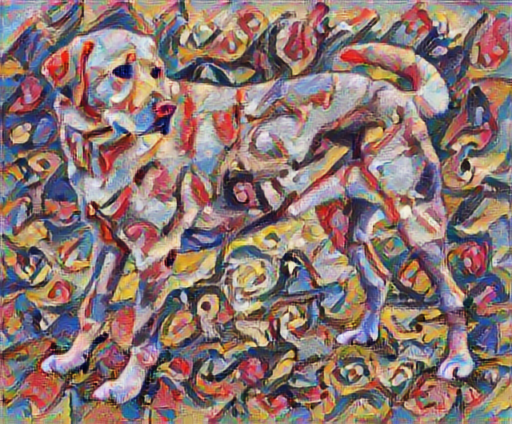

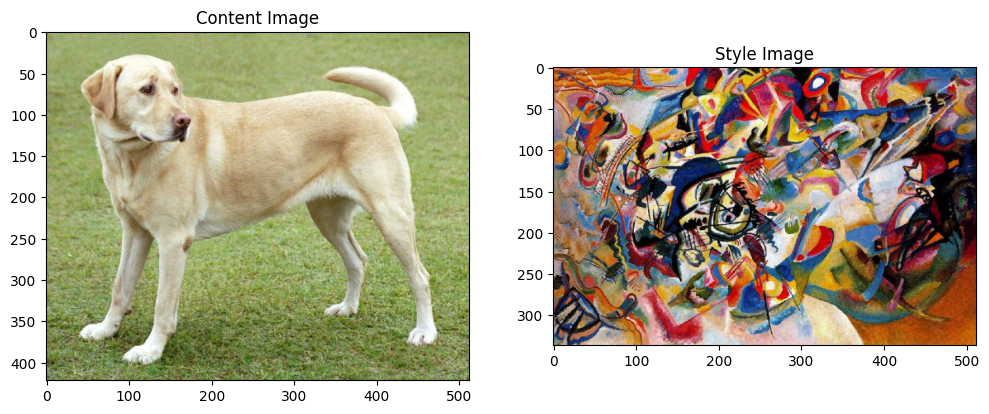

In [48]:
content_image = load_img(content_path1)
style_image = load_img(style_path1)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

#Fast Style Transfer using TF-Hub

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
newimage(stylized_image)

example 2

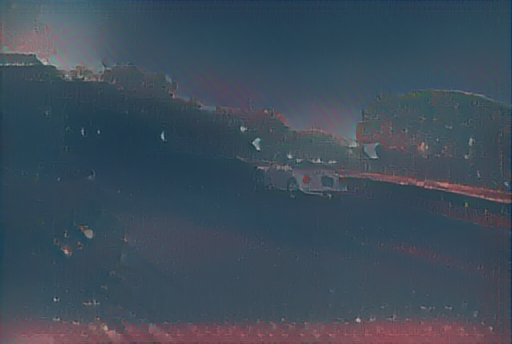

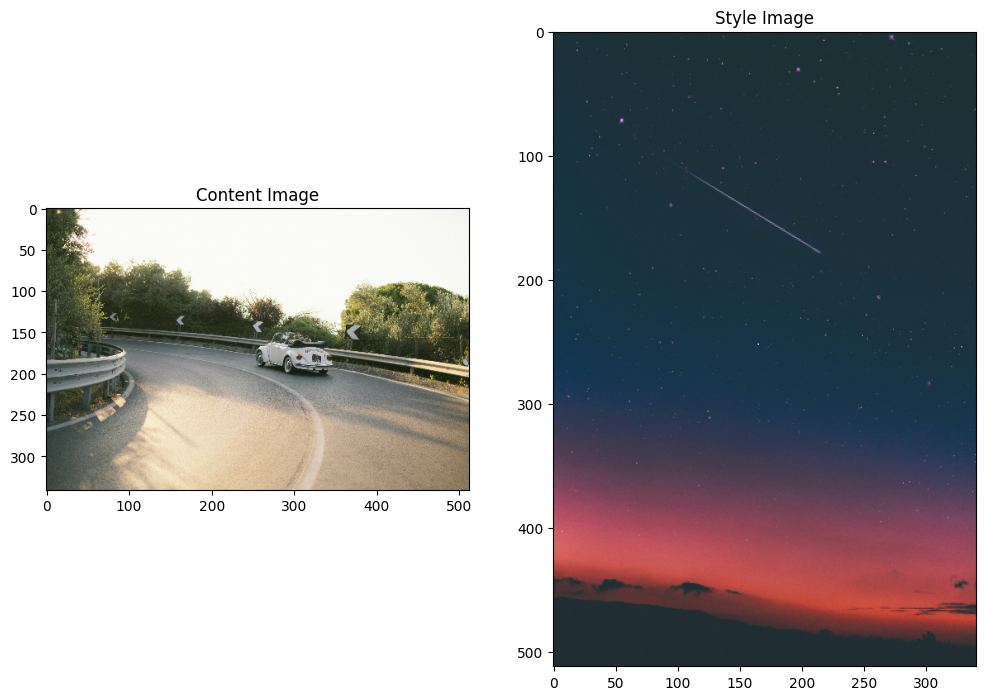

In [49]:
content_image = load_img(content_path2)
style_image = load_img(style_path2)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

#Fast Style Transfer using TF-Hub

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
newimage(stylized_image)

example 3

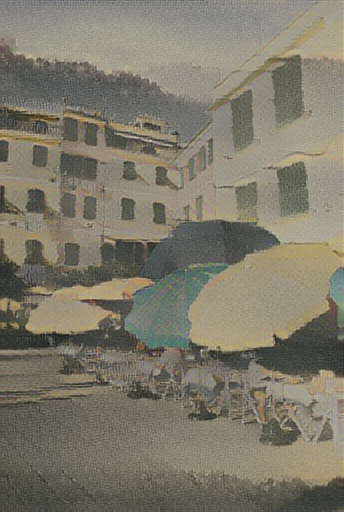

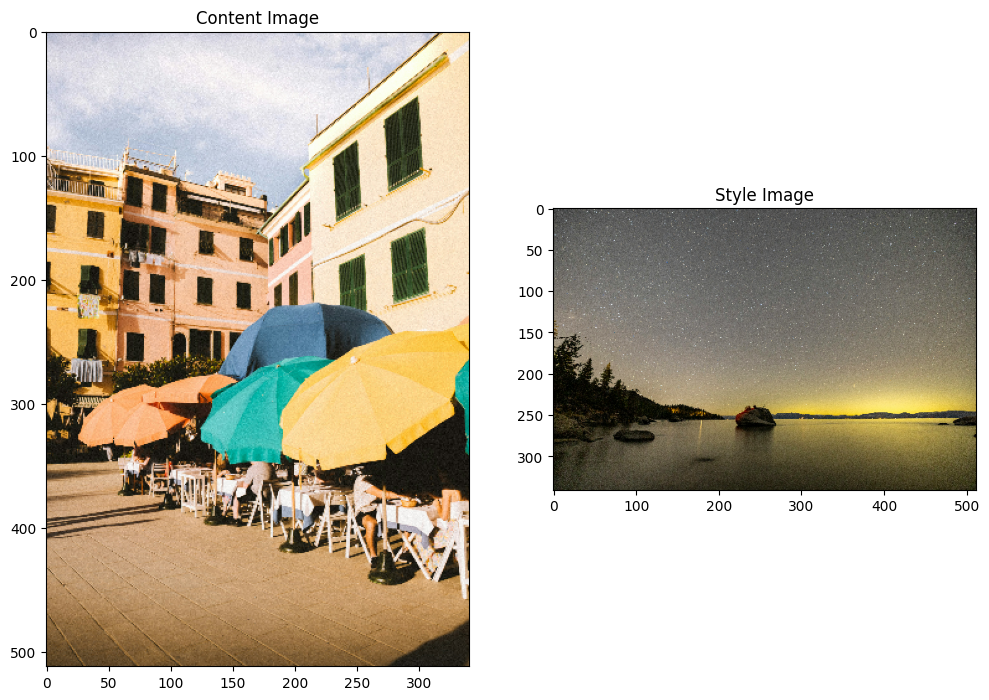

In [50]:
content_image = load_img(content_path3)
style_image = load_img(style_path3)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

#Fast Style Transfer using TF-Hub

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
newimage(stylized_image)


example 4

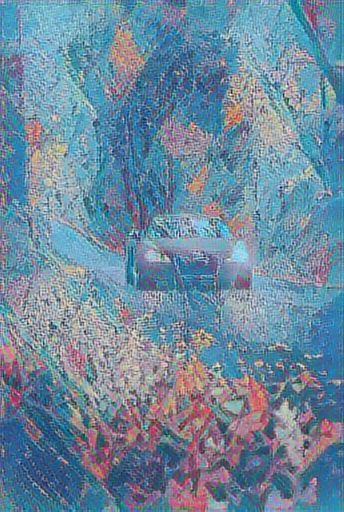

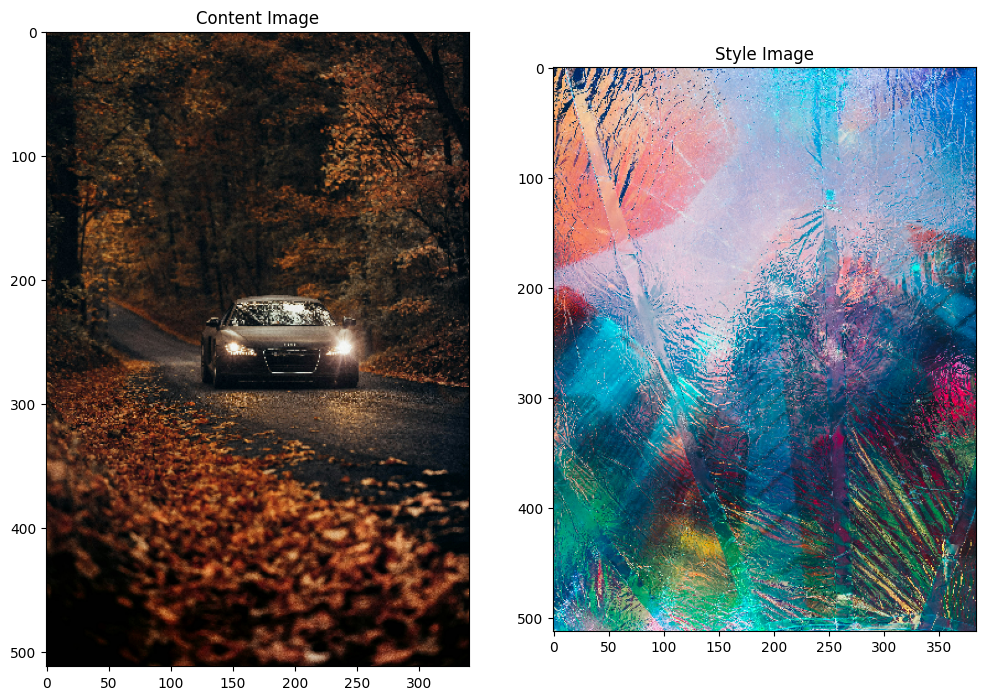

In [51]:
content_image = load_img(content_path4)
style_image = load_img(style_path4)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

#Fast Style Transfer using TF-Hub

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
newimage(stylized_image)